In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

date_list = pd.date_range('2020-07-01', periods=3, freq='D')

movie_title = []
movie_point = []
movie_date = []

for today in tqdm(date_list):
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=" + (today.strftime('%Y%m%d'))
    html = urlopen(url)
    
    soup = BeautifulSoup(html.read(),"html.parser")
    
    titles = soup.find_all('div',{'class':'tit5'})
    print(titles)
    points = soup.find_all('td',{'class':'point'})
    print(points)
    
    titles_text = []
    points_text = []
    date = []
    
    for t, p in zip(titles, points):
        titles_text.append(t.text.strip(' \n'))
        points_text.append(float(p.text))
        date.append(today)
        
    movie_title += titles_text
    movie_point += points_text
    movie_date += date
        
frame = pd.DataFrame({'date':movie_date, 'title':movie_title, 'point':movie_point})
frame

  0%|          | 0/3 [00:00<?, ?it/s]

[<div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=171539" title="그린 북">그린 북</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=174830" title="가버나움">가버나움</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=144906" title="베일리 어게인">베일리 어게인</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=151196" title="원더">원더</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=181710" title="포드 V 페라리">포드 V 페라리</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=179518" title="주전장">주전장</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=169240" title="아일라">아일라</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=157243" title="당갈">당갈</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=17421" title="쇼생크 탈출">쇼생크 탈출</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=10200" title="터미네이터 2:오리지널">터미네이터 2:오리지널</a>
</div>, <div class="tit5">


,date,title,point
0,2020-07-01,그린 북,9.59
1,2020-07-01,가버나움,9.59
2,2020-07-01,베일리 어게인,9.53
3,2020-07-01,원더,9.49
4,2020-07-01,포드 V 페라리,9.49
...,...,...,...
145,2020-07-03,주토피아,9.35
146,2020-07-03,모노노케 히메,9.35
147,2020-07-03,클레멘타인,9.35
148,2020-07-03,쉰들러 리스트,9.35


In [18]:
import numpy as np
pd.options.display.float_format = '{:.3f}'.format

movie_point_frame = pd.pivot_table(frame, values=['point'], index=['title'], aggfunc=np.mean)
movie_point_frame_sort = movie_point_frame.sort_values(by='point', ascending=False)

movie_point_frame_sort.head(10)

,point
title,
가버나움,9.590
그린 북,9.590
베일리 어게인,9.530
포드 V 페라리,9.490
주전장,9.490
원더,9.490
아일라,9.490
당갈,9.470
터미네이터 2:오리지널,9.440


In [19]:
import pandas as pd

frame = pd.DataFrame({'date':movie_date, 'title':movie_title, 'point':movie_point})

expr = "title == '토이 스토리 3'"
search_movie = frame.query(expr)
print(search_movie)

          date     title  point
28  2020-07-01  토이 스토리 3  9.380
77  2020-07-02  토이 스토리 3  9.380
127 2020-07-03  토이 스토리 3  9.380


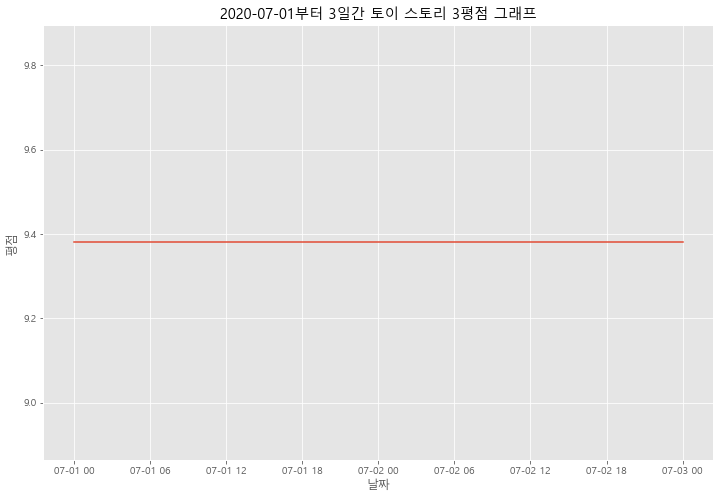

In [22]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

plt.figure(figsize=(12,8))
plt.title('2020-07-01부터 3일간 토이 스토리 3평점 그래프')
plt.plot(search_movie['date'], search_movie['point'])
plt.xlabel('날짜')
plt.ylabel('평점')
plt.show()